### Numpy basics - Random Numbers

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd

npr.seed(123)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

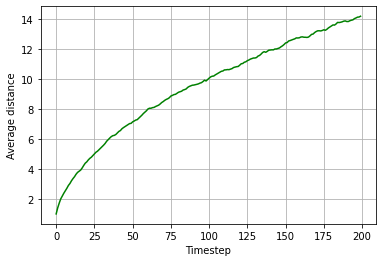

In [2]:
x = 1000
walk = npr.choice([-1,+1], size = (x, 200))    # Generate a sample assuming a uniform distribution over (-1, 1)

walk_average = np.sqrt(np.mean(np.power(walk.cumsum(axis = 1), 2), axis = 0))


plt.plot(walk_average, "g")
plt.xlabel('Timestep')
plt.ylabel('Average distance')
plt.grid()
plt.show()


Did you get what you expected? Yes, this derives from  very general properties of stochastic processes and 
in fact the position of a 1D random walker increases linearly with time.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [3]:
! cat populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


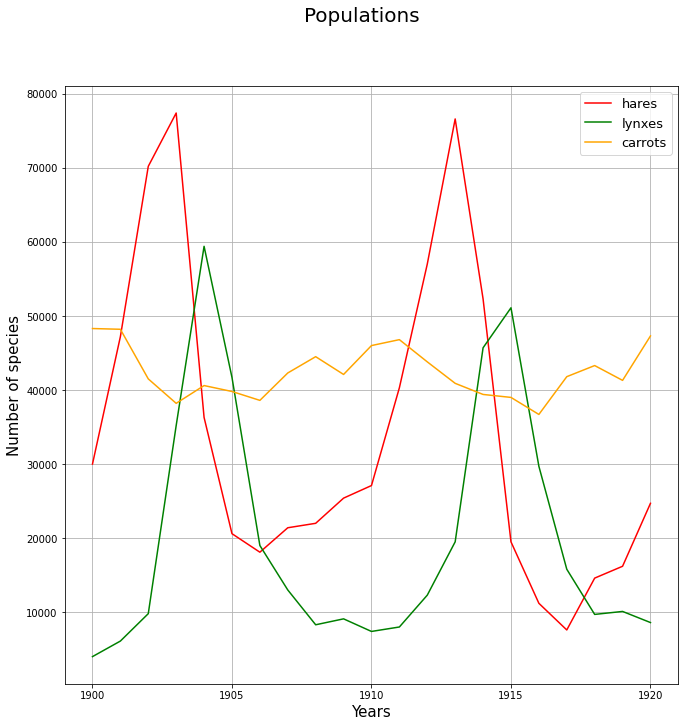

In [4]:
file = np.loadtxt("./populations.txt")
year = file[:, 0]
hares = file[:, 1]
lynxes = file[:, 2]
carrots = file[:, 3]


plt.figure(figsize=(11, 11))
plt.plot(year, hares, "r", label = "hares")
plt.plot(year, lynxes, "g", label = "lynxes")
plt.plot(year, carrots, "orange", label = "carrots")
plt.legend(loc = 1, prop = {"size": 13})
plt.suptitle("Populations", fontsize=20)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Number of species", fontsize = 15)
plt.gca().xaxis.get_major_locator().set_params(integer = True)
plt.grid()
plt.show()

In [5]:
df = pd.DataFrame(file, columns = ["year", "hares", "lynxes", "carrots"])
df.describe() 

,year,hares,lynxes,carrots
count,21.000000,21.000000,21.000000,21.000000
mean,1910.000000,34080.952381,20166.666667,42400.000000
std,6.204837,21413.981859,16655.999920,3404.555771
min,1900.000000,7600.000000,4000.000000,36700.000000
25%,1905.000000,19500.000000,8600.000000,39800.000000
50%,1910.000000,25400.000000,12300.000000,41800.000000
75%,1915.000000,47200.000000,29700.000000,44500.000000
max,1920.000000,77400.000000,59400.000000,48300.000000


In [6]:
# corrcoef : Pearson’s coefficient -> linear correlation

lincorr_HL = np.corrcoef(hares, lynxes) 
lincorr_HC = np.corrcoef(hares, carrots)
lincorr_LC = np.corrcoef(lynxes, carrots)

print("Hares & Linxes - Correlation matrix:\n", lincorr_HL)
print("\nHares & Carrots - Correlation matrix:\n", lincorr_HC)
print("\nLinxes & Carrots - Correlation matrix:\n", lincorr_LC)

Hares & Linxes - Correlation matrix:
 [[1.         0.07189206]
 [0.07189206 1.        ]]

Hares & Carrots - Correlation matrix:
 [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]

Linxes & Carrots - Correlation matrix:
 [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]


In [7]:
# Which species has the highest population each year?

names = ["year", "hares", "lynxes", "carrots"]
maxindex = np.argmax(file, axis = 1)                    #I can avoid to skip the year colum -> each value it's less!
maxpop = np.array([names[index] for index in maxindex])

maxpop2D = np.dstack((year, maxpop))
print("\nHighest population each year:\n\n", maxpop2D)


Highest population each year:

 [[['1900.0' 'carrots']
  ['1901.0' 'carrots']
  ['1902.0' 'hares']
  ['1903.0' 'hares']
  ['1904.0' 'lynxes']
  ['1905.0' 'lynxes']
  ['1906.0' 'carrots']
  ['1907.0' 'carrots']
  ['1908.0' 'carrots']
  ['1909.0' 'carrots']
  ['1910.0' 'carrots']
  ['1911.0' 'carrots']
  ['1912.0' 'hares']
  ['1913.0' 'hares']
  ['1914.0' 'hares']
  ['1915.0' 'lynxes']
  ['1916.0' 'carrots']
  ['1917.0' 'carrots']
  ['1918.0' 'carrots']
  ['1919.0' 'carrots']
  ['1920.0' 'carrots']]]


Do you feel there is some evident correlation here? Yes, and this particular pattern of prey-predator populations over the years can be explained employing the Lokta Volterra model which is used to describe the dynamics of a biological system.